### Import Libraries

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras.layers import Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import cv2
from sklearn.model_selection import train_test_split
import os
import pandas as pd
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from tensorflow import keras
import seaborn as sn

In [38]:
import os
os.chdir("C:\\Users\\karth\\Downloads\\pjt 1\\pjt 1\\PJT 1\\Train")
print(os.getcwd())

C:\Users\karth\Downloads\pjt 1\pjt 1\PJT 1\Train


In [39]:
os.getcwd()

'C:\\Users\\karth\\Downloads\\pjt 1\\pjt 1\\PJT 1\\Train'

### Read Images

In [40]:
count = 0
images = []
label = []
path = os.getcwd()
classes_list = os.listdir(path)
print("Total Classes:",len(classes_list))
noOfClasses=len(classes_list)
print("Importing Classes.....")
for x in range (0,noOfClasses):
    imglist = os.listdir(path+"/"+str(count))
    for y in imglist:
        img = cv2.imread(path+"/"+str(count)+"/"+y)
        img =cv2.resize(img,(32,32))
        images.append(img)
        label.append(count)
    print(count, end =" ")
    count +=1
print(" ")

Total Classes: 43
Importing Classes.....
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42  


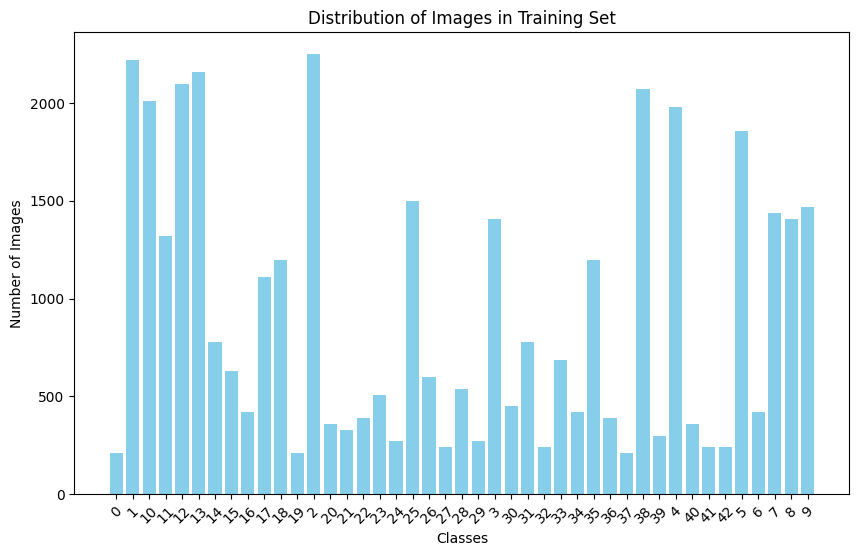

In [41]:
def get_image_distribution(dataset_path):
    # Dictionary to store the count of images per class
    class_count = {}

    # Iterate through each class directory
    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_path):
            # Count the number of images in each class
            num_images = len(os.listdir(class_path))
            class_count[class_name] = num_images

    return class_count

def plot_distribution(class_count):
    # Plotting the distribution
    plt.figure(figsize=(10, 6))
    plt.bar(class_count.keys(), class_count.values(), color='skyblue')
    plt.xlabel('Classes')
    plt.ylabel('Number of Images')
    plt.title('Distribution of Images in Training Set')
    plt.xticks(rotation=45)
    plt.show()

# Path to your training dataset
dataset_path = path

# Get the distribution of images
distribution = get_image_distribution(dataset_path)

# Plot the distribution
plot_distribution(distribution)


In [42]:
images = np.array(images)
classNo = np.array(label)
data = np.array(images)
data = np.array(data).reshape(-1, 32, 32, 3)

### Splitting Dataset

In [43]:
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=0.2)
Y_tests=y_test
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2) 

print("Data Shapes")
print("Train",end = "");print(X_train.shape,y_train.shape)
print("Validation",end = "");print(X_validation.shape,y_validation.shape)
print("Test",end = "");print(X_test.shape,y_test.shape)

Data Shapes
Train(25093, 32, 32, 3) (25093,)
Validation(6274, 32, 32, 3) (6274,)
Test(7842, 32, 32, 3) (7842,)


### Preprocessing

In [44]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img


def equalize(img):
    img = cv2.equalizeHist(img)
    return img


def preprocessing(img):
    img = grayscale(img) 
    img = equalize(img)  
    img = img / 255 # image normalization 
    return img


X_train = np.array(list(map(preprocessing, X_train)))
X_validation = np.array(list(map(preprocessing, X_validation)))
X_test = np.array(list(map(preprocessing, X_test)))
### reshape data into channel 1
X_train=X_train.reshape(-1,32,32,1)
X_validation=X_validation.reshape(-1,32,32,1)
X_test=X_test.reshape(-1,32,32,1)

### Data Augmentation

In [61]:
dataGen = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1,
                             rotation_range=10)

batches = dataGen.flow(X_train, y_train,batch_size=20)
X_batch, y_batch = next(batches)

In [62]:
y_train = to_categorical(y_train, noOfClasses)
y_validation = to_categorical(y_validation, noOfClasses)
y_test = to_categorical(y_test, noOfClasses)

### Create Model

In [63]:
#CNN Model
def seq_Model():
    no_Of_Filters = 60
    size_of_Filter = (5, 5)
    size_of_Filter2 = (3, 3)
    size_of_pool = (2, 2)
    no_Of_Nodes = 500
    model = Sequential()
    model.add((Conv2D(no_Of_Filters, size_of_Filter, input_shape=(32, 32, 1),
                      activation='relu')))
    model.add((Conv2D(no_Of_Filters, size_of_Filter, activation='relu')))
    model.add(MaxPooling2D(pool_size=size_of_pool))

    model.add((Conv2D(no_Of_Filters // 2, size_of_Filter2, activation='relu')))
    model.add((Conv2D(no_Of_Filters // 2, size_of_Filter2, activation='relu')))
    model.add(MaxPooling2D(pool_size=size_of_pool))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(no_Of_Nodes, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(noOfClasses, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate= 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model
    
model = seq_Model()
print(model.summary())#####Print model summary

C:\Users\karth\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 60)          │           1,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 24, 24, 60)          │          90,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 12, 12, 60)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 10, 10, 30)          │          16,230 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 30)            │           8,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 30)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 4, 4, 30)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 480)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 500)                 │         240,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 43)                  │          21,543 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 378,023 (1.44 MB)

 Trainable params: 378,023 (1.44 MB)

 Non-trainable params: 0 (0.00 B)

None


### Train Model

In [48]:
batch_size_val=50
steps_per_epoch_val=500
epochs_val=50
##Train the model##
history=model.fit(dataGen.flow(X_train,y_train,batch_size=batch_size_val),steps_per_epoch=steps_per_epoch_val,epochs=epochs_val,validation_data=(X_validation,y_validation),shuffle=1)

C:\Users\karth\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 107s 203ms/step - accuracy: 0.1411 - loss: 3.1981 - val_accuracy: 0.7644 - val_loss: 0.8295
Epoch 2/50
  2/500 ━━━━━━━━━━━━━━━━━━━━ 1:26 174ms/step - accuracy: 0.5550 - loss: 1.4753

C:\Users\karth\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.5500 - loss: 1.4764 - val_accuracy: 0.7918 - val_loss: 0.7984
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 100s 200ms/step - accuracy: 0.5942 - loss: 1.3501 - val_accuracy: 0.8959 - val_loss: 0.3519
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.5800 - loss: 1.2260 - val_accuracy: 0.9173 - val_loss: 0.3107
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 95s 191ms/step - accuracy: 0.7289 - loss: 0.8758 - val_accuracy: 0.9560 - val_loss: 0.1819
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.7600 - loss: 0.7490 - val_accuracy: 0.9421 - val_loss: 0.2112
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 95s 191ms/step - accuracy: 0.8003 - loss: 0.6486 - val_accuracy: 0.9715 - val_loss: 0.1111
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.8000 - loss: 0.6167 - val_accuracy: 0.9646 - val_loss: 0.1316
Epoch 9/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 96s 192ms/step - accuracy: 0.8349 - loss: 0.5288 - val_accur

### Plot Graph


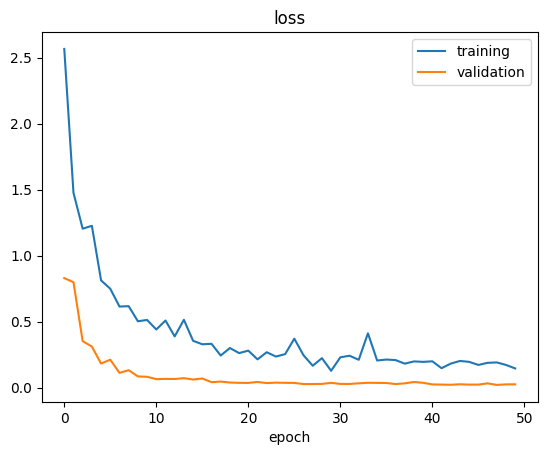

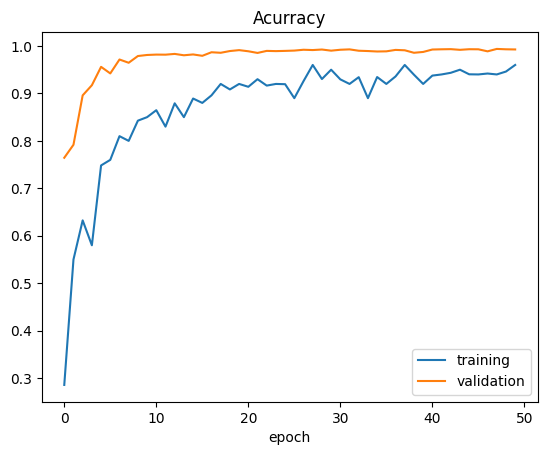

In [49]:
##Plot Graph##
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()

In [50]:
#save model
model.save('traffif_sign_model.h5')

###### Evaluate Model

In [51]:
# Existing Code
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Score:', score[0])
print('Test Accuracy:', score[1])

Test Score: 0.019562914967536926
Test Accuracy: 0.9943891763687134


In [52]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import pandas as pd

# Load the model
model = load_model("C:/Users/karth/Downloads/pjt 1/pjt 1/PJT 1/Train/traffif_sign_model.h5")

# Predicting on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate classification report as dictionary
report_dict = classification_report(y_true, y_pred_classes, digits=4, output_dict=True)

# Remove unwanted entries
for key in ["accuracy", "macro avg", "weighted avg"]:
    report_dict.pop(key, None)

# Calculate per-class accuracy
class_accuracies = {}
classes = np.unique(y_true)
for cls in classes:
    idx = np.where(y_true == cls)
    acc = accuracy_score(y_true[idx], y_pred_classes[idx])
    class_accuracies[str(cls)] = acc

# Convert to DataFrame
report_df = pd.DataFrame(report_dict).transpose()
report_df["accuracy"] = report_df.index.map(class_accuracies)

# Reorder columns
report_df = report_df[["accuracy", "precision", "recall", "f1-score"]]

# Print classification report without global metrics
print("Per-Class Evaluation Metrics:\n")
print(report_df)


246/246 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step
Per-Class Evaluation Metrics:

    accuracy  precision    recall  f1-score
0   1.000000   1.000000  1.000000  1.000000
1   0.997758   0.997758  0.997758  0.997758
2   0.997619   0.990544  0.997619  0.994069
3   0.996656   0.983498  0.996656  0.990033
4   1.000000   1.000000  1.000000  1.000000
5   0.982808   0.977208  0.982808  0.980000
6   1.000000   1.000000  1.000000  1.000000
7   0.959596   0.996503  0.959596  0.977702
8   0.996063   0.976834  0.996063  0.986355
9   1.000000   1.000000  1.000000  1.000000
10  1.000000   0.997585  1.000000  0.998791
11  1.000000   1.000000  1.000000  1.000000
12  0.995423   0.997706  0.995423  0.996564
13  0.995455   1.000000  0.995455  0.997722
14  0.993976   0.993976  0.993976  0.993976
15  0.981982   1.000000  0.981982  0.990909
16  1.000000   1.000000  1.000000  1.000000
17  1.000000   0.995763  1.000000  0.997877
18  0.991968   1.000000  0.991968  0.995968
19  0.975610   1.000000  0.975610  0.987654
20 

In [53]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Predict classes
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate per-class accuracy and then macro average of it
num_classes = np.unique(y_true).shape[0]
per_class_acc = []
for cls in range(num_classes):
    cls_idx = y_true == cls
    cls_acc = np.mean(y_pred_classes[cls_idx] == y_true[cls_idx])
    per_class_acc.append(cls_acc)
macro_accuracy = np.mean(per_class_acc)

# Calculate macro precision, recall, f1
precision = precision_score(y_true, y_pred_classes, average='macro')
recall = recall_score(y_true, y_pred_classes, average='macro')
f1 = f1_score(y_true, y_pred_classes, average='macro')

# Display all metrics
print("Accuracy     :", macro_accuracy)
print("Precision    :", precision)
print("Recall       :", recall)
print("F1-Score     :", f1)


246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step
Accuracy     : 0.9931738969077395
Precision    : 0.994218469564218
Recall       : 0.9931738969077395
F1-Score     : 0.9936553907430031


246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step


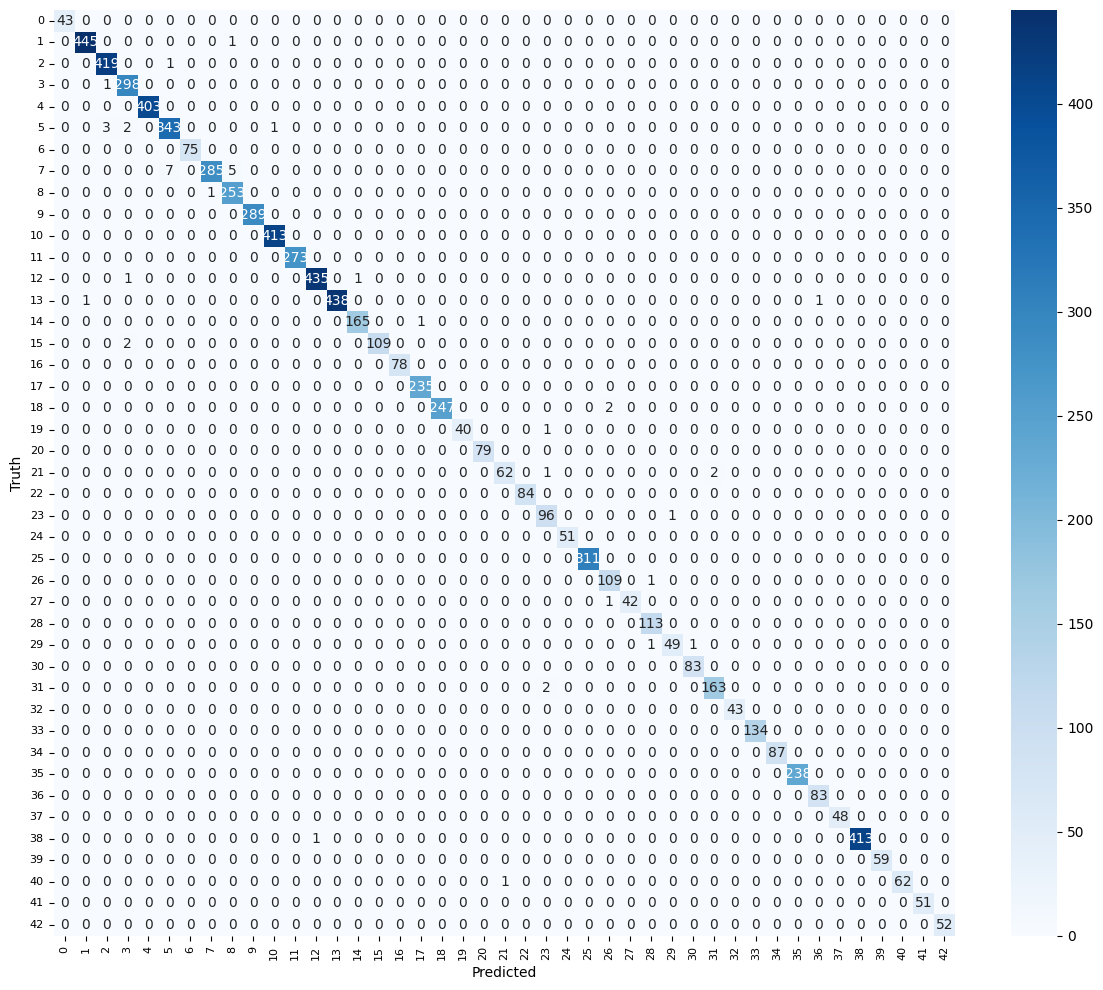

In [54]:
#####Confusion matrix code####
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(Y_tests, y_pred)

plt.figure(figsize=(12, 10))
ax = sn.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=True)

classes = list(range(cm.shape[0]))
ax.set_xticks(np.arange(len(classes)) + 0.5)
ax.set_yticks(np.arange(len(classes)) + 0.5)
ax.set_xticklabels(classes, rotation=90, fontsize=8)
ax.set_yticklabels(classes, rotation=0, fontsize=8)
ax.tick_params(axis='both', which='major', pad=4)

plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.tight_layout()
plt.savefig('confusionmatrix.png', dpi=300, bbox_inches='tight')
plt.show()

### Test Model

In [55]:
import numpy as np
import cv2
import os
from tensorflow import keras

In [56]:
threshold = 0.90  # THRESHOLD
font = cv2.FONT_HERSHEY_SIMPLEX
model = keras.models.load_model('C:/Users/karth/Downloads/pjt 1/pjt 1/PJT 1/Train/traffif_sign_model.h5')


### Preprocessing for sign detection in image

In [57]:
def preprocess_img(imgBGR, erode_dilate=True):  # pre-processing fro detect signs in  image.
    rows, cols, _ = imgBGR.shape
    imgHSV = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2HSV)
    Bmin = np.array([100, 43, 46])
    Bmax = np.array([124, 255, 255])
    img_Bbin = cv2.inRange(imgHSV, Bmin, Bmax)

    Rmin1 = np.array([0, 43, 46])
    Rmax1 = np.array([10, 255, 255])
    img_Rbin1 = cv2.inRange(imgHSV, Rmin1, Rmax1)

    Rmin2 = np.array([156, 43, 46])
    Rmax2 = np.array([180, 255, 255])
    img_Rbin2 = cv2.inRange(imgHSV, Rmin2, Rmax2)
    img_Rbin = np.maximum(img_Rbin1, img_Rbin2)
    img_bin = np.maximum(img_Bbin, img_Rbin)

    if erode_dilate is True:
        kernelErosion = np.ones((3, 3), np.uint8)
        kernelDilation = np.ones((3, 3), np.uint8)
        img_bin = cv2.erode(img_bin, kernelErosion, iterations=2)
        img_bin = cv2.dilate(img_bin, kernelDilation, iterations=2)

    return img_bin

### Count Traffic Signs

In [58]:
def contour_detect(img_bin, min_area, max_area=-1, wh_ratio=2.0):
    rects = []
    contours, _ = cv2.findContours(img_bin.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
    if len(contours) == 0:
        return rects

    max_area = img_bin.shape[0] * img_bin.shape[1] if max_area < 0 else max_area
    for contour in contours:
        area = cv2.contourArea(contour)
        if area >= min_area and area <= max_area:
            x, y, w, h = cv2.boundingRect(contour)
            if 1.0 * w / h < wh_ratio and 1.0 * h / w < wh_ratio:
                rects.append([x, y, w, h])
    return rects

### Preprocessing of Image before Prediction

In [59]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img


def equalize(img):
    img = cv2.equalizeHist(img)
    return img


def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img / 255
    return img

### Label Name

In [60]:
def getCalssName(classNo):
    if classNo == 0:
        return 'Speed Limit 20 km/h'
    elif classNo == 1:
        return 'Speed Limit 30 km/h'
    elif classNo == 2:
        return 'Speed Limit 50 km/h'
    elif classNo == 3:
        return 'Speed Limit 60 km/h'
    elif classNo == 4:
        return 'Speed Limit 70 km/h'
    elif classNo == 5:
        return 'Speed Limit 80 km/h'
    elif classNo == 6:
        return 'End of Speed Limit 80 km/h'
    elif classNo == 7:
        return 'Speed Limit 100 km/h'
    elif classNo == 8:
        return 'Speed Limit 120 km/h'
    elif classNo == 9:
        return 'No passing'
    elif classNo == 10:
        return 'No passing for vehicles over 3.5 metric tons'
    elif classNo == 11:
        return 'Right-of-way at the next intersection'
    elif classNo == 12:
        return 'Priority road'
    elif classNo == 13:
        return 'Yield'
    elif classNo == 14:
        return 'Stop'
    elif classNo == 15:
        return 'No vehicles'
    elif classNo == 16:
        return 'Vehicles over 3.5 metric tons prohibited'
    elif classNo == 17:
        return 'No entry'
    elif classNo == 18:
        return 'General caution'
    elif classNo == 19:
        return 'Dangerous curve to the left'
    elif classNo == 20:
        return 'Dangerous curve to the right'
    elif classNo == 21:
        return 'Double curve'
    elif classNo == 22:
        return 'Bumpy road'
    elif classNo == 23:
        return 'Slippery road'
    elif classNo == 24:
        return 'Road narrows on the right'
    elif classNo == 25:
        return 'Road work'
    elif classNo == 26:
        return 'Traffic signals'
    elif classNo == 27:
        return 'Pedestrians'
    elif classNo == 28:
        return 'Children crossing'
    elif classNo == 29:
        return 'Bicycles crossing'
    elif classNo == 30:
        return 'Beware of ice/snow'
    elif classNo == 31:
        return 'Wild animals crossing'
    elif classNo == 32:
        return 'End of all speed and passing limits'
    elif classNo == 33:
        return 'Turn right ahead'
    elif classNo == 34:
        return 'Turn left ahead'
    elif classNo == 35:
        return 'Ahead only'
    elif classNo == 36:
        return 'Go straight or right'
    elif classNo == 37:
        return 'Go straight or left'
    elif classNo == 38:
        return 'Keep right'
    elif classNo == 39:
        return 'Keep left'
    elif classNo == 40:
        return 'Roundabout mandatory'
    elif classNo == 41:
        return 'End of no passing'
    elif classNo == 42:
        return 'End of no passing by vehicles over 3.5 metric tons'

### Main function

In [ ]:
import pyttsx3
import time
def speak_prediction(classIndex):
    className = getCalssName(classIndex)
    # Prepare the text to be spoken
    text = f"{className}."
    # Initialize the pyttsx3 engine
    engine = pyttsx3.init()
    # Set properties (optional)
    engine.setProperty('rate', 150)  # Speed of speech
    engine.setProperty('volume', 1)  # Volume level (0.0 to 1.0)
    # Speak the text
    engine.say(text)
    engine.runAndWait()  # Wait until the speech is finished

if __name__ == "__main__":
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("Error: Camera not accessible")
        exit()

    while True:
        ret, img = cap.read()
        if not ret:
            print("Error: Unable to capture frame from camera")
            break

        # Display the original camera feed
        cv2.imshow("Original Camera Feed", img)
        img_bin = preprocess_img(img, False)  # Preprocess the image
        cv2.imshow("Binary Image", img_bin)# Process the binary image
        min_area = img_bin.shape[0] * img.shape[1] / (25 * 25)
        rects = contour_detect(img_bin, min_area=min_area)  # Assuming `contour_detect` is defined
        img_bbx = img.copy()
        detected = False  # Track whether a valid signboard is detected
        for rect in rects:
            xc = int(rect[0] + rect[2] / 2)
            yc = int(rect[1] + rect[3] / 2)
            size = max(rect[2], rect[3])
            x1 = max(0, int(xc - size / 2))
            y1 = max(0, int(yc - size / 2))
            x2 = min(img.shape[1], int(xc + size / 2))
            y2 = min(img.shape[0], int(yc + size / 2))
            if rect[2] > 100 and rect[3] > 100:
                cv2.rectangle(img_bbx, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 0, 255), 2)
            crop_img = np.asarray(img[y1:y2, x1:x2])
            crop_img = cv2.resize(crop_img, (32, 32))
            crop_img = preprocessing(crop_img)
            cv2.imshow("After Processing", crop_img)
            crop_img = crop_img.reshape(1, 32, 32, 1)  # Reshape to (1,32,32,1)            
            predictions = model.predict(crop_img)
            classIndex = np.argmax(predictions, axis=-1)
            probabilityValue = np.amax(predictions)            
            if probabilityValue > threshold:  # Speak only if probability is above the threshold
                detected = True
                cv2.putText(img_bbx, str(classIndex) + " " + str(getCalssName(classIndex)), 
                            (rect[0], rect[1] - 10), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
                cv2.putText(img_bbx, str(round(probabilityValue * 100, 2)) + "%", 
                            (rect[0], rect[1] - 40), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
                speak_prediction(classIndex)  # Speak the detected signboard
                time.sleep(1)  # Pause briefly to avoid repeated speech for the same detection
        if detected:
            cv2.imshow("Detection Result", img_bbx)
        if cv2.waitKey(1) & 0xFF == ord('q'):  # Press 'q' to exit
            break
    cap.release()
    cv2.destroyAllWindows()
